<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Regression: Exercise</h2>
<div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [2]:
def genarate_data_1d(points, min, max, fn, noise, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(low=min, high=max, size=(points, 1))
    np.random.seed(seed)
    y = fn(x[:,0]) + np.random.normal(scale=noise, size=points)
    return x, y

def plot(x, y, pred_x=None, pred_y=None, ax=plt):
    ax.plot(x, y, '.', label='data')
    if pred_x is not None:
        ax.plot(pred_x, pred_y, '.', color='r', label='our function')
    ax.legend();

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise solved</strong>
  <p>Train a linear model to fit the data</p>
<div>

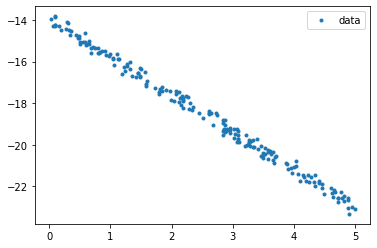

In [3]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=lambda x: -x*1.8 - 14, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

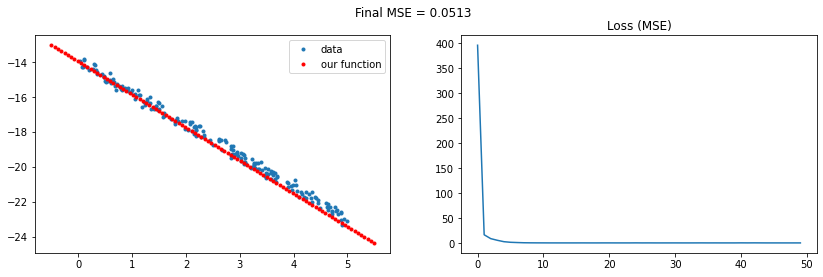

In [4]:
inp = keras.Input(shape=(1,))
out = layers.Dense(1, name='regression')(inp)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=50, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 1</strong>
  <p>Train a MLP in less than 100 epochs to get a MSE lower than 0.1</p>
<div>

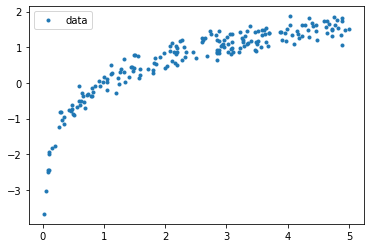

In [5]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=np.log, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

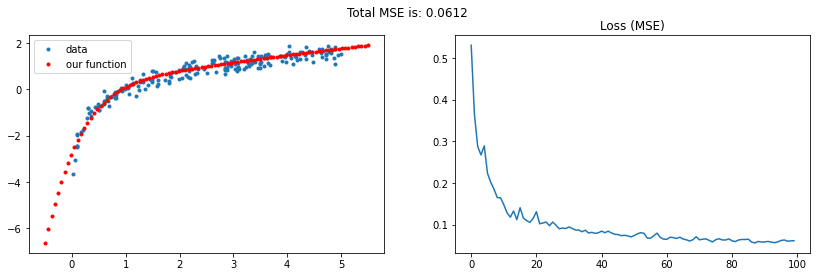

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(100, activation = 'swish',input_shape = (1,)),
    layers.Dense(300,activation = 'swish',name = 'Hidden'),
    layers.Dense(800,activation = 'swish',name= 'Hidden1'),
    layers.Dense(1)
])
model.compile(loss = 'mse',optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y,epochs = 100,batch_size = 16,verbose = 0)
pred_y = model.predict(pred_x)

fig,(plot1,plot2) = plt.subplots(1,2,figsize = (14,4))
fig.suptitle('Total MSE is: ' + str(round(hist.history['loss'][-1],4)) )
plot(x,y,pred_x,pred_y,ax = plot1)
plot2.plot(hist.history['loss'])
plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 2</strong>
  <p>Train a MLP in less than 100 epochs to get a loss lower than 0.06</p>
<div>

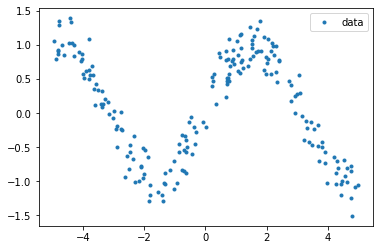

In [27]:
x,y = genarate_data_1d(points=200, min=-5, max=5, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-5.5, stop=5.5, num=100)

plot(x,y)

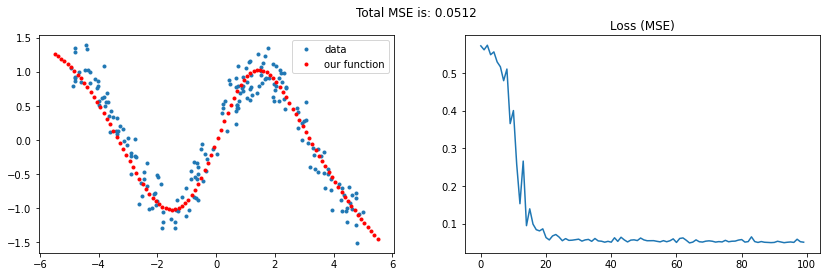

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(100, activation = 'swish',input_shape = (1,)),
    layers.Dense(300,activation = 'swish',name = 'Hidden'),
    layers.Dense(800,activation = 'swish',name= 'Hidden1'),
    layers.Dense(1)
])
model.compile(loss = 'mse',optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y,epochs = 100,batch_size = 16,verbose = 0)
pred_y = model.predict(pred_x)

fig,(plot1,plot2) = plt.subplots(1,2,figsize = (14,4))
fig.suptitle('Total MSE is: ' + str(round(hist.history['loss'][-1],4)) )
plot(x,y,pred_x,pred_y,ax = plot1)
plot2.plot(hist.history['loss'])
plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 3</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Hint: <strong style="color:#01ff84">Standard scale</strong> the data.</p>
<div>

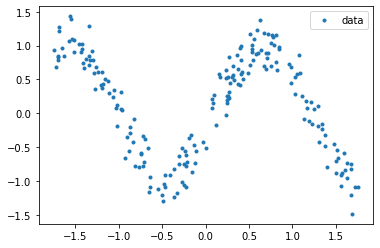

In [34]:
from sklearn.preprocessing import StandardScaler
x,y = genarate_data_1d(points=200, min=1000, max=1010, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-2, stop=2, num=100)
x = StandardScaler().fit_transform(x)
plot(x,y)

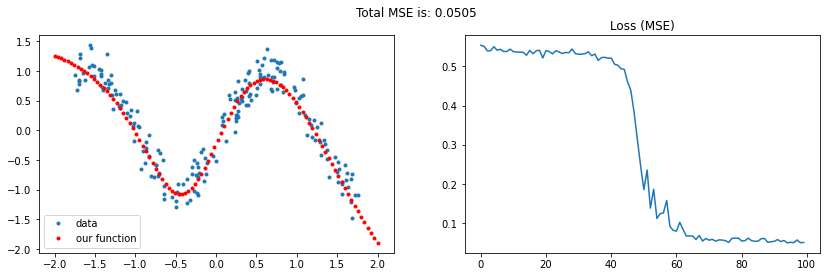

In [35]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(10, activation = 'swish',input_shape = (1,)),
    layers.Dense(30,activation = 'swish',name = 'Hidden'),
    layers.Dense(80,activation = 'swish',name= 'Hidden1'),
    layers.Dense(1)
])
model.compile(loss = 'mse',optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y,epochs = 100,batch_size = 16,verbose = 0)
pred_y = model.predict(pred_x)

fig,(plot1,plot2) = plt.subplots(1,2,figsize = (14,4))
fig.suptitle('Total MSE is: ' + str(round(hist.history['loss'][-1],4)) )
plot(x,y,pred_x,pred_y,ax = plot1)
plot2.plot(hist.history['loss'])
plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 4</strong>
  <p>Train a MLP to fit the data</p>
<div>

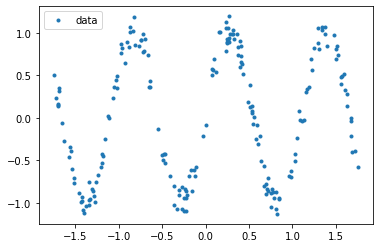

In [43]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=np.sin,  noise=0.1)
pred_x = np.linspace(start=-2, stop=2, num=200)
x = StandardScaler().fit_transform(x)
plot(x,y)

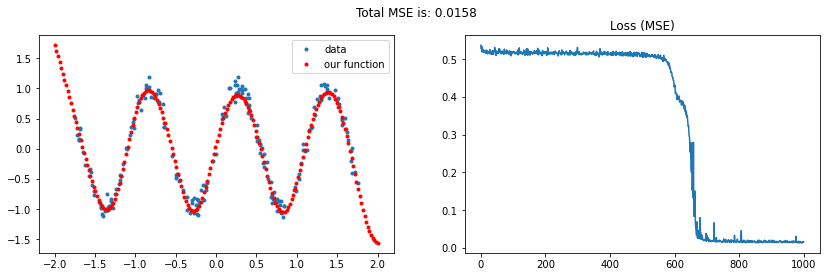

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(10, activation = 'swish',input_shape = (1,)),
    layers.Dense(30,activation = 'swish',name = 'Hidden'),
    layers.Dense(80,activation = 'swish',name= 'Hidden1'),
    layers.Dense(1)
])
model.compile(loss = 'mse',optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y,epochs = 1000,batch_size = 16,verbose = 0)
pred_y = model.predict(pred_x)

fig,(plot1,plot2) = plt.subplots(1,2,figsize = (14,4))
fig.suptitle('Total MSE is: ' + str(round(hist.history['loss'][-1],4)) )
plot(x,y,pred_x,pred_y,ax = plot1)
plot2.plot(hist.history['loss'])
plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 5</strong>
  <p>Train a MLP to fit the data</p>
<div>

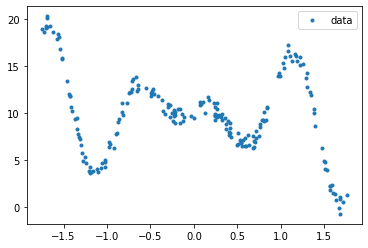

In [46]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=lambda x: np.cos(x)*x+10, noise=0.5)
pred_x = np.linspace(start=-2, stop=2, num=200)
x = StandardScaler().fit_transform(x)
plot(x,y)

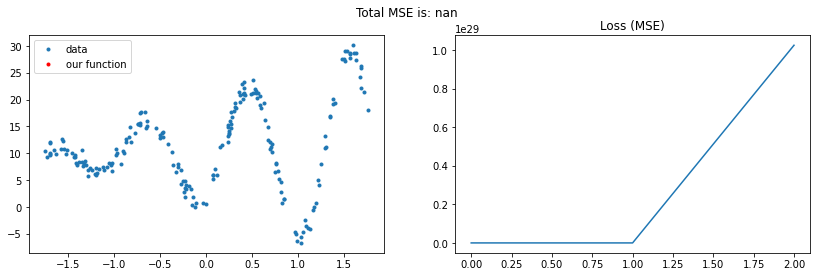

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(1000, activation = 'swish',input_shape = (1,)),
    layers.Dense(1000,activation = 'swish',name = 'Hidden'),
    layers.Dense(1000,activation = 'swish',name= 'Hidden1'),
    layers.Dense(1)
])
model.compile(loss = 'mse',optimizer = optimizers.SGD(0.1))
hist = model.fit(x,y,epochs =200,batch_size = 62,verbose = 0)
pred_y = model.predict(pred_x)

fig,(plot1,plot2) = plt.subplots(1,2,figsize = (14,4))
fig.suptitle('Total MSE is: ' + str(round(hist.history['loss'][-1],4)) )
plot(x,y,pred_x,pred_y,ax = plot1)
plot2.plot(hist.history['loss'])
plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 6</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Train a LGBMRegressor to fit the data and visualize the predictions</p>
<div>

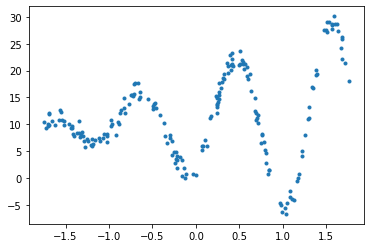

In [53]:
x,y = genarate_data_1d(points=200, min=0, max=20, fn=lambda x: np.cos(x)*x+10, noise=1)
pred_x = np.linspace(start=-2, stop=2, num=200).reshape(200,-1)
x = StandardScaler().fit_transform(x)
plt.plot(x,y,".");

In [51]:
!pip install lightgbm

  Using cached lightgbm-3.1.1-py2.py3-none-win_amd64.whl (754 kB)


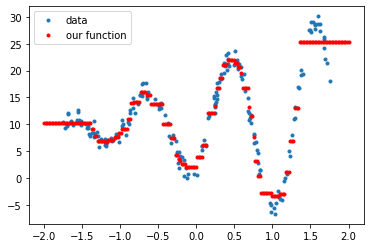

In [54]:
import lightgbm
from lightgbm import LGBMRegressor

model = LGBMRegressor()
model.fit(x, y)

pred_y = model.predict(pred_x)
plot(x, y, pred_x, pred_y)